# LAB03 - DATA ANALYSIS

## A PCA AND LDA ON THE IRIS DATA 

In [1]:
import pandas as pd

1.

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2.

In [3]:
def color_function (row):
   if row['Class'] == 'setosa' :
      return 'red'
   if row['Class'] == 'virginica' :
      return 'blue'
   if row['Class'] == 'versicolor' :
      return 'green'
    
df['color'] = df.apply (lambda row: color_function(row), axis=1)

3.

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
subset = df[df.columns[0:4]]
fitted = scaler.fit_transform(subset)
df[df.columns[0:4]] = fitted
df.describe()
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,color
0,-0.900681,1.032057,-1.341272,-1.312977,setosa,red
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa,red
2,-1.385353,0.337848,-1.398138,-1.312977,setosa,red
3,-1.506521,0.106445,-1.284407,-1.312977,setosa,red
4,-1.021849,1.263460,-1.341272,-1.312977,setosa,red


4.

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import matplotlib.patches as mpatches

pca = PCA()
X = pca.fit_transform(fitted)

var = pca.explained_variance_ratio_
print(var)

sns.pointplot(x=np.arange(0, 4), y=var)
plt.title("Variance explained")
plt.xlabel("Principal Components")
plt.ylabel("Percentage of variance")
plt.show();

fig, ax = plt.subplots();
principalDf = pd.DataFrame(data = X[:, 0:2] , columns = ['PC1', 'PC2']);
scatter = principalDf.plot.scatter(x='PC1', y='PC2', c=df['color'], ax=ax);
plt.xlabel("PC1")
plt.ylabel("PC2")

pop_a = mpatches.Patch(color='red', label='Setosa');
pop_b = mpatches.Patch(color='blue', label='Virginica');
pop_c = mpatches.Patch(color='green', label='Versicolor');
handles=[pop_a,pop_b, pop_c]
ax.legend(handles=handles);

[0.72770452 0.23030523 0.03683832 0.00515193]


<Figure size 640x480 with 1 Axes>

5.

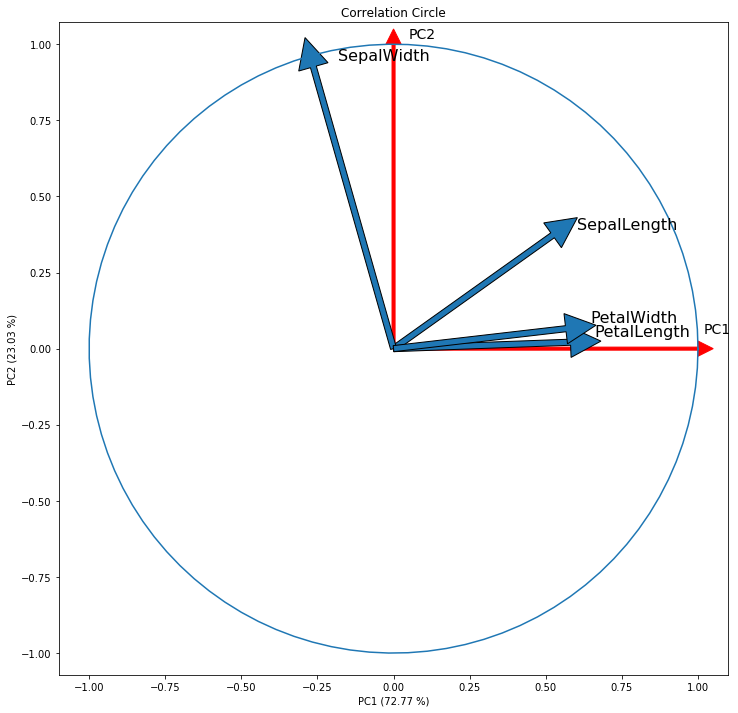

In [6]:
(fig, ax) = plt.subplots(figsize=(12, 12))

# PC1 axe
ax.arrow(0, 0, 1, 0, head_width=0.05,head_length=0.05, width=0.01, color='red');
plt.text(1 + 0.02, 0.05, 'PC1', fontsize=14);
# PC2 axe
ax.arrow(0, 0, 0, 1, head_width=0.05, head_length=0.05, width=0.01, color='red');
plt.text(0.05, 1 + 0.02, 'PC2', fontsize=14);

# Pour chaque composante
for i in range(0, len(pca.components_)):
    ax.arrow(0, 0,
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1, head_length=0.1, width=0.02);
    # On ajoute une légende à la flèche
    plt.text(pca.components_[0, i] + 0.08, pca.components_[1, i] + 0.02, df.columns.values[i], fontsize=16);

# On trace le cercle
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
plt.xlabel("PC1 ({0:.2f} %)".format(var[0] * 100))
plt.ylabel("PC2 ({0:.2f} %)".format(var[1] * 100))
ax.set_title('Correlation Circle')
plt.show();

6.

In [7]:
data = df[df.columns[0:4]]
target = df[df.columns[4:6]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

7.

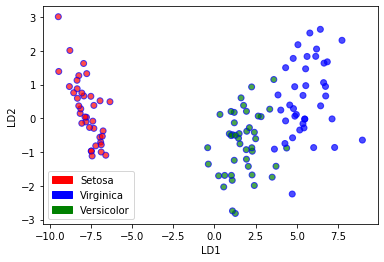

Matrice de confusion : 
 [[12  0  0]
 [ 0  7  0]
 [ 0  0 11]]
Pourcentage de précision : 1.0


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2);
X_lda = lda.fit_transform(X_train, y_train['Class']);

lda_var = lda.explained_variance_ratio_

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_train['color'],
    alpha=0.7,
    edgecolors='b'
)
plt.legend(handles=handles)
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show();

y_pred = lda.predict(X_test)
from sklearn.metrics import confusion_matrix
print("Matrice de confusion : \n", confusion_matrix(y_test['Class'],y_pred));
from sklearn.metrics import accuracy_score
print("Pourcentage de précision :", accuracy_score(y_test['Class'], y_pred));

8.

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
X_qda = qda.fit(X_train, y_train['Class']);

y_pred_qda = X_qda.predict(X_test);
print("Matrice de confusion : \n", confusion_matrix(y_test['Class'],y_pred_qda));
print("Précision :", accuracy_score(y_test['Class'], y_pred_qda));

Matrice de confusion : 
 [[12  0  0]
 [ 0  7  0]
 [ 0  0 11]]
Précision : 1.0


## B MDS, LLE and Isomap 

### B.1 golub data 

1.

In [13]:
df = pd.read_csv('golub_data.csv',sep=',',header=0);

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
subset = df[df.columns[:]]
fitted = scaler.fit_transform(subset)
df[df.columns[:]] = fitted
df = df.T
df.head()

,G 1,G 2,G 3,G 4,G 5,G 6,G 7,G 8,G 9,G 10,...,G 7120,G 7121,G 7122,G 7123,G 7124,G 7125,G 7126,G 7127,G 7128,G 7129
Ex 1,-0.377790,-0.350848,-0.308889,-0.244405,-0.413565,-0.529724,-0.195380,-0.361006,-0.171972,-0.192288,...,-0.201564,-0.057579,-0.338481,-0.111463,-0.299614,0.066972,-0.137963,-0.267372,-0.198913,-0.299614
Ex 2,-0.335912,-0.309177,-0.280011,-0.164968,-0.386547,-0.441638,-0.413283,-0.347659,-0.238693,-0.249630,...,-0.211147,0.059447,-0.294189,-0.100560,-0.286492,0.037168,-0.160107,-0.275150,-0.248820,-0.285277
Ex 3,-0.311532,-0.300669,-0.404472,-0.156633,-0.432233,-0.542473,-0.267678,-0.428612,-0.198073,-0.367457,...,-0.154219,0.201447,-0.267678,-0.213362,-0.260033,0.176904,0.031661,-0.264459,-0.189222,-0.297451
Ex 4,-0.314539,-0.305565,-0.143591,-0.251716,-0.435913,-0.506857,-0.189319,-0.364969,-0.235903,-0.243596,...,-0.154275,0.100011,-0.163677,-0.182481,-0.303855,0.011118,-0.184191,-0.278213,-0.202995,-0.295735
Ex 5,-0.330649,-0.338647,-0.318022,-0.215316,-0.382844,-0.405574,-0.284348,-0.337384,-0.256567,-0.179959,...,-0.220367,-0.012852,-0.262039,-0.073886,-0.296975,-0.180800,-0.153861,-0.280138,-0.262460,-0.296554


2.

In [14]:
labels = pd.read_csv("golub_class2.csv",sep = ',',header = None)

3.

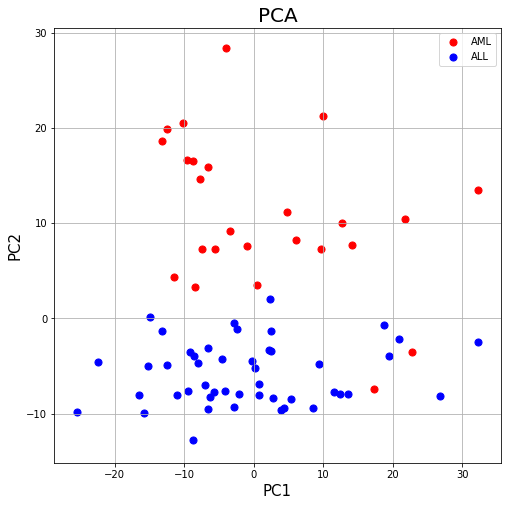

In [16]:
from sklearn.decomposition import PCA
pca = PCA();
X_pca = pca.fit_transform(df[df.columns[:]]);
principalDf = pd.DataFrame(data = X_pca[:,0:2],columns = ['PC1','PC2']);
finalDf = pd.concat([principalDf,labels[:][1]],axis = 1);
finalDf.columns = ['PC1', 'PC2', 'Type'];
types = ['AML','ALL'];
colors = ['r','b'];

fig = plt.figure(figsize = (8,8));
ax = fig.add_subplot(1,1,1) ;
ax.set_xlabel('PC1', fontsize = 15);
ax.set_ylabel('PC2', fontsize = 15);
ax.set_title('PCA', fontsize = 20);

for type,color in zip(types,colors):
    indicesToKeep = finalDf['Type'] == type
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50);
ax.legend(types);
ax.grid();

4.

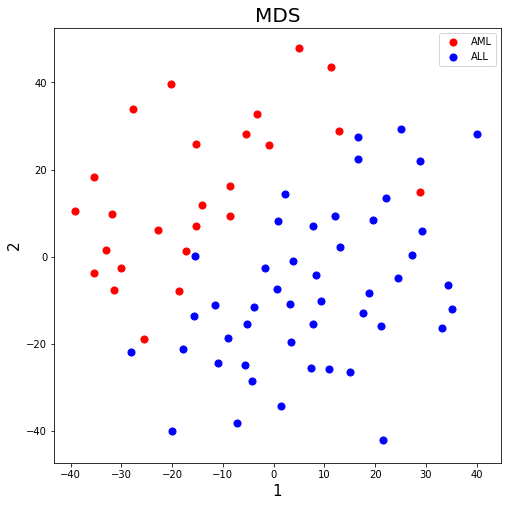

In [18]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
mds = MDS();
X_mds = mds.fit_transform(df[df.columns[:]]);
principalDf = pd.DataFrame(data = X_mds[:,0:2],columns = ['1','2']);
finalDf = pd.concat([principalDf,labels[:][1]],axis = 1);
finalDf.columns = ['1', '2', 'Type'];
types = ['AML','ALL'];
colors = ['r','b'];

fig = plt.figure(figsize = (8,8));
ax = fig.add_subplot(1,1,1);
ax.set_xlabel('1', fontsize = 15);
ax.set_ylabel('2', fontsize = 15);
ax.set_title('MDS', fontsize = 20);

for type,color in zip(types,colors):
    indicesToKeep = finalDf['Type'] == type;
    ax.scatter(finalDf.loc[indicesToKeep, '1']
               , finalDf.loc[indicesToKeep, '2']
               , c = color
               , s = 50);
    ax.legend(types);
    ax.grid();

5.

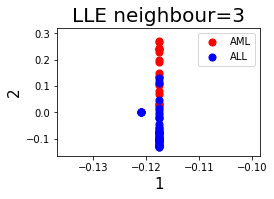

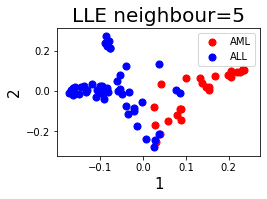

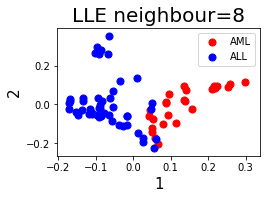

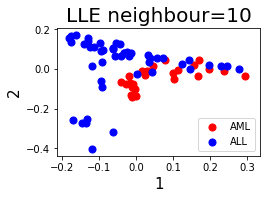

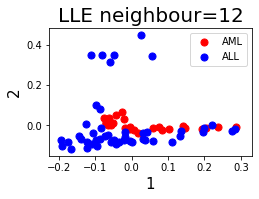

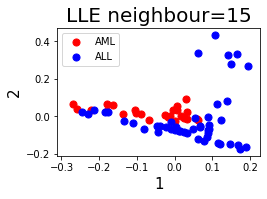

In [22]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

neighbors = [3,5,8,10,12,15]
indice = 1
for neighbour in neighbors :
    lle = LLE(neighbour,n_components=2);
    X_lle = lle.fit_transform(df[ df.columns[:]]);
    principalDf = pd.DataFrame(data = X_lle[:,0:2],columns = ['1','2']);
    finalDf = pd.concat([principalDf,labels[:][1]],axis = 1);
    finalDf.columns = ['1', '2', 'Type'];
    types = ['AML','ALL'];
    colors = ['r','b'];
    fig = plt.figure(figsize = (8,8));
    ax = fig.add_subplot(3,2,indice);
    ax.set_xlabel('1', fontsize = 15);
    ax.set_ylabel('2', fontsize = 15);
    ax.set_title('LLE neighbour=' + str(neighbour) , fontsize = 20);
    indice += 1;

    for type,color in zip(types,colors):
        indicesToKeep = finalDf['Type'] == type;
        ax.scatter(finalDf.loc[indicesToKeep, '1']
                   , finalDf.loc[indicesToKeep, '2']
                   , c = color
                   , s = 50);
        ax.legend(types);
        ax.grid();

6.

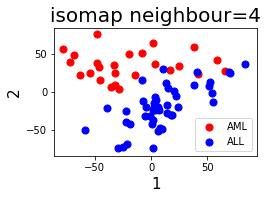

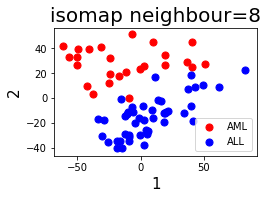

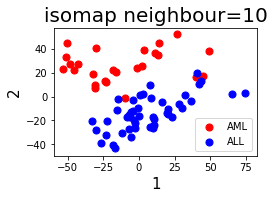

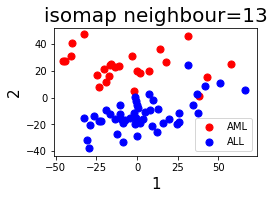

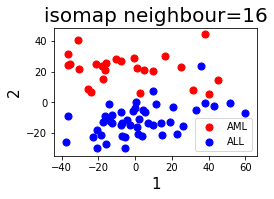

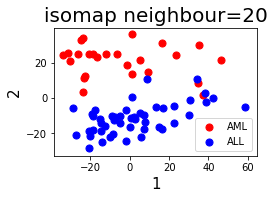

In [23]:
from sklearn.manifold import Isomap as ISO
neighbors = [4, 8, 10, 13, 16,20]
indice = 1
for neighbour in neighbors :
    iso = ISO(neighbour,n_components=2)
    X_iso = iso.fit_transform(df[ df.columns[:]])
    principalDf = pd.DataFrame(data = X_iso[:,0:2],columns = ['1','2'])
    finalDf = pd.concat([principalDf,labels[:][1]],axis = 1)
    finalDf.columns = ['1', '2', 'Type']
    types = ['AML','ALL']
    colors = ['r','b']
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(3,2,indice) 
    ax.set_xlabel('1', fontsize = 15)
    ax.set_ylabel('2', fontsize = 15)
    ax.set_title('isomap neighbour=' + str(neighbour) , fontsize = 20)
    indice += 1

    for type,color in zip(types,colors):
        indicesToKeep = finalDf['Type'] == type
        ax.scatter(finalDf.loc[indicesToKeep, '1']
                   , finalDf.loc[indicesToKeep, '2']
                   , c = color
                   , s = 50)
        ax.legend(types)
        ax.grid()

### B2 Alon data

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
subset = df[df.columns[:]]
fitted = scaler.fit_transform(subset)
df[df.columns[:]] = fitted

In [25]:
labels = pd.read_csv("alon_class.csv",sep = ',',header = 0)

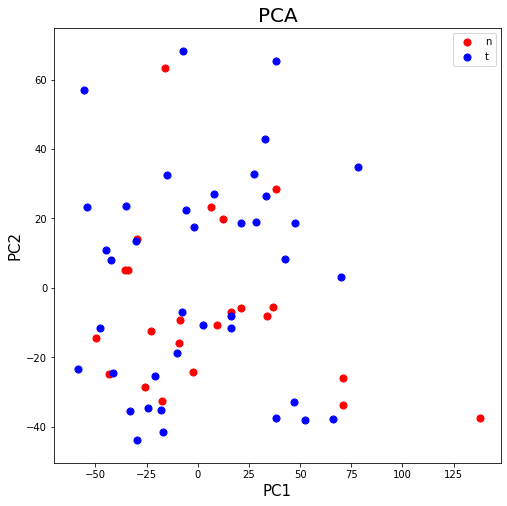

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(df[df.columns[:]])
principalDf = pd.DataFrame(data = X_pca[:,0:2],columns = ['PC1','PC2'])
finalDf = pd.concat([principalDf,labels[:]],axis = 1)
finalDf.columns = ['PC1', 'PC2', 'Type']
types = ['n','t']
colors = ['r','b']
fig = plt.figure(figsize = (8,8));
ax = fig.add_subplot(1,1,1) ;
ax.set_xlabel('PC1', fontsize = 15);
ax.set_ylabel('PC2', fontsize = 15);
ax.set_title('PCA', fontsize = 20);

for type,color in zip(types,colors):
    indicesToKeep = finalDf['Type'] == type
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50);
    ax.legend(types);
    ax.grid();

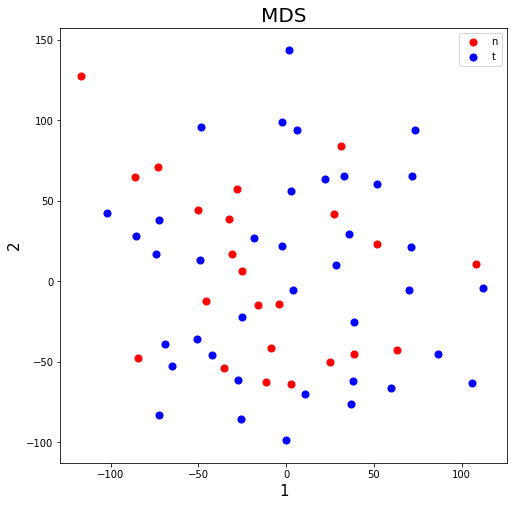

In [27]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
mds = MDS()
X_mds = mds.fit_transform(df[df.columns[:]])
principalDf = pd.DataFrame(data = X_mds[:,0:2],columns = ['1','2'])
finalDf = pd.concat([principalDf,labels[:]],axis = 1)
finalDf.columns = ['1', '2', 'Type']
types = ['n','t']
colors = ['r','b']

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('1', fontsize = 15)
ax.set_ylabel('2', fontsize = 15)
ax.set_title('MDS', fontsize = 20)

for type,color in zip(types,colors):
    indicesToKeep = finalDf['Type'] == type
    ax.scatter(finalDf.loc[indicesToKeep, '1']
               , finalDf.loc[indicesToKeep, '2']
               , c = color
               , s = 50)
    ax.legend(types)
    ax.grid()

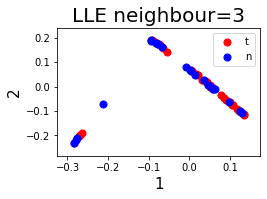

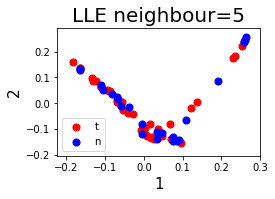

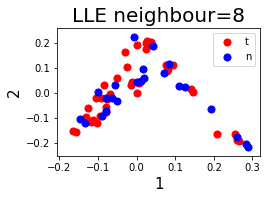

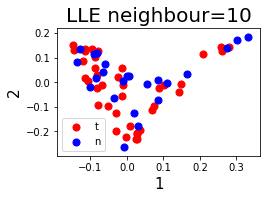

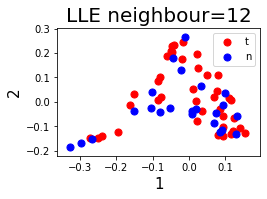

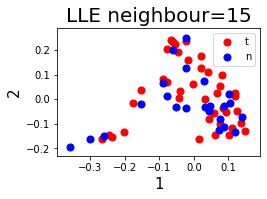

In [28]:
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

neighbors = [3,5,8,10,12,15]
indice = 1
for neighbour in neighbors :
    lle = LLE(neighbour,n_components=2)
    X_lle = lle.fit_transform(df[ df.columns[:]])
    principalDf = pd.DataFrame(data = X_lle[:,0:2],columns = ['1','2'])
    finalDf = pd.concat([principalDf,labels[:]],axis = 1)
    finalDf.columns = ['1', '2', 'Type']
    types = ['t','n']
    colors = ['r','b']
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(3,2,indice) 
    ax.set_xlabel('1', fontsize = 15)
    ax.set_ylabel('2', fontsize = 15)
    ax.set_title('LLE neighbour=' + str(neighbour) , fontsize = 20)
    indice = indice + 1

    for type,color in zip(types,colors):
        indicesToKeep = finalDf['Type'] == type
        ax.scatter(finalDf.loc[indicesToKeep, '1']
                   , finalDf.loc[indicesToKeep, '2']
                   , c = color
                   , s = 50)
        ax.legend(types)
        ax.grid()

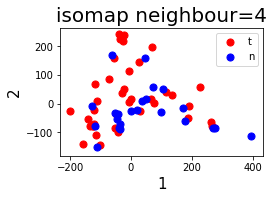

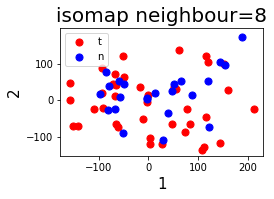

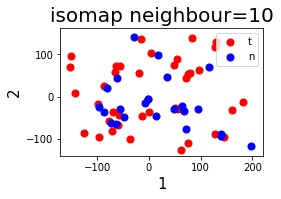

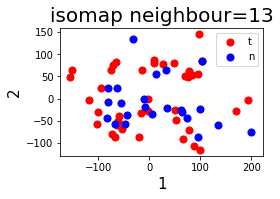

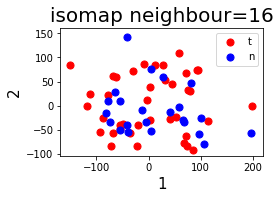

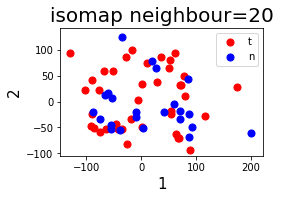

In [29]:
neighbors = [ 4, 8, 10, 13, 16,20]
indice = 1
for neighbour in neighbors :
    iso = ISO(neighbour,n_components=2)
    X_iso = iso.fit_transform(df[ df.columns[:]])
    principalDf = pd.DataFrame(data = X_iso[:,0:2],columns = ['1','2'])
    finalDf = pd.concat([principalDf,labels[:]],axis = 1)
    finalDf.columns = ['1', '2', 'Type']
    types = ['t','n']
    colors = ['r','b']
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(3,2,indice) 
    ax.set_xlabel('1', fontsize = 15)
    ax.set_ylabel('2', fontsize = 15)
    ax.set_title('isomap neighbour=' + str(neighbour) , fontsize = 20)
    indice = indice + 1

    for type,color in zip(types,colors):
        indicesToKeep = finalDf['Type'] == type
        ax.scatter(finalDf.loc[indicesToKeep, '1']
                   , finalDf.loc[indicesToKeep, '2']
                   , c = color
                   , s = 50)
        ax.legend(types)
        ax.grid()

## C SOM analysis with the Sompy library 

2. 3.

C:\Users\TLC10\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Topographic error = 0.0; Quantization error = 0.33654887112986925


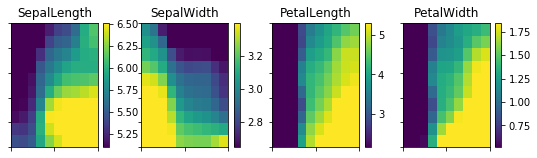

In [30]:
df = pd.read_csv('iris.csv')
df.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
mapping = {'setosa': 1, 'versicolor': 2, 'virginica': 3}
df.replace({'Class': mapping })
names = df.columns[:-1]


from sompy.sompy import SOMFactory
sm = SOMFactory().build(df[df.columns[:-1]].values, mapsize=(10, 10), normalization = 'var', initialization='random', component_names=names)
sm.train(n_job=1, verbose=False) # les paramètres du cercle (comme le rayon) sont calculés à partir de la taille de la matrice passée en paramètre avant
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

         
from sompy.visualization.mapview import View2D
view2D = View2D(10, 10, " ", text_size=10)
view2D.show(sm, col_sz=7, which_dim="all", denormalize=True)
plt.show()

4.

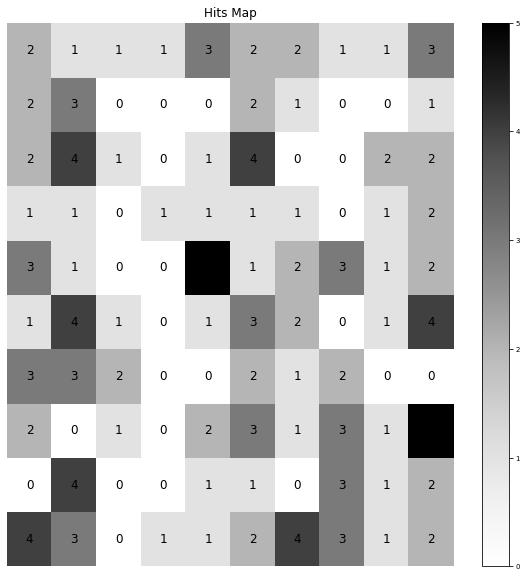

In [31]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(10,10,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

5.

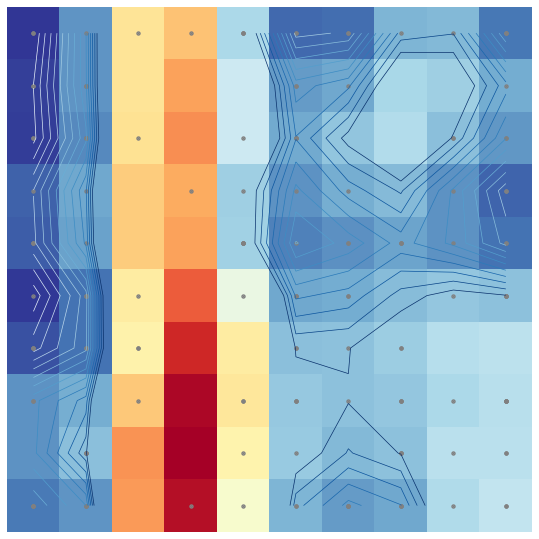

In [32]:
from sompy.visualization.umatrix import UMatrixView
matrix = UMatrixView(10, 10, "matrix")
matrix.show(sm, distance2=2, show_data=True, contooor=True);